In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import os
%matplotlib inline
# plt.rcParams['font.sans-serif']=['Simhei'] #让jupyter中的图画上的中文都显示出来
plt.rcParams['axes.unicode_minus']=False
os.getcwd()
path = os.getcwd()

# 1. Import Data

In [2]:
data = pd.read_csv(path + r'/Data/tap4fun_data/tap_fun_train.csv')

In [3]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [4]:
data.shape

(2288007, 109)

In [5]:
data.columns

Index(['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
       'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
       'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
       ...
       'pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count',
       'pve_battle_count', 'pve_lanch_count', 'pve_win_count',
       'avg_online_minutes', 'pay_price', 'pay_count', 'prediction_pay_price'],
      dtype='object', length=109)

In [6]:
data.isnull().sum().sum() # missing values

0

In [7]:
data.duplicated().sum() # duplicated values

0

In [8]:
data["user_id"].duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2288007.0,1.529543e+06,9.399393e+05,1.0,749992.5,1.419095e+06,2.299006e+06,3.190530e+06
wood_add_value,2288007.0,4.543069e+05,4.958667e+06,0.0,0.0,4.203800e+04,1.531180e+05,1.239962e+09
wood_reduce_value,2288007.0,3.698433e+05,3.737720e+06,0.0,0.0,9.830000e+03,9.855700e+04,7.995875e+08
stone_add_value,2288007.0,1.897788e+05,4.670620e+06,0.0,0.0,0.000000e+00,0.000000e+00,1.214869e+09
stone_reduce_value,2288007.0,1.376074e+05,3.370166e+06,0.0,0.0,0.000000e+00,0.000000e+00,7.962378e+08
...,...,...,...,...,...,...,...,...
pve_win_count,2288007.0,2.556749e+00,1.184737e+01,0.0,0.0,0.000000e+00,1.000000e+00,4.880000e+02
avg_online_minutes,2288007.0,1.020749e+01,3.895946e+01,0.0,0.5,1.833333e+00,4.833333e+00,2.049667e+03
pay_price,2288007.0,5.346691e-01,2.263835e+01,0.0,0.0,0.000000e+00,0.000000e+00,7.457950e+03
pay_count,2288007.0,5.770699e-02,7.090886e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.050000e+02


# 2. Label Information

In [11]:
data.columns

Index(['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
       'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
       'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
       ...
       'pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count',
       'pve_battle_count', 'pve_lanch_count', 'pve_win_count',
       'avg_online_minutes', 'pay_price', 'pay_count', 'prediction_pay_price'],
      dtype='object', length=109)

In [12]:
y = data.iloc[:,-1] # label: the true overall payment in the first 45 days
SevenDayPayAmount = data.loc[:,'pay_price'] # the first 7 day payment

In [14]:
y.describe([0.75,0.9,0.99])

count    2.288007e+06
mean     1.793146e+00
std      8.846303e+01
min      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
90%      0.000000e+00
99%      3.970000e+00
max      3.297781e+04
Name: prediction_pay_price, dtype: float64

In [15]:
def RevenueFocus(RevenueSeries):
    # Display 7-day & 45-day payments
    
    AllUsers = len(RevenueSeries)
    PaidUsers = (RevenueSeries != 0).sum()
    TotalPayment = RevenueSeries.sum() 
    
    # Print Result
    print("Pay Rate：{:.3f}%".format(100*PaidUsers/AllUsers))
    print("Number of PaidUsers：{}".format(PaidUsers))
    print("Total Payment：{:.3f}".format(TotalPayment))
    print("ARPU：{:.3f}".format(TotalPayment/AllUsers)) # ARPU:Average Revenue Per User
    print("ARPPU：{:.3f}".format(TotalPayment/PaidUsers)) # ARPPU: Average Revenue Per Paying User
    print("Percentage of top 500 high paying users by value：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:500].sum()/TotalPayment))
    print("Percentage of top 1000 high paying users by value：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:1000].sum()/TotalPayment))
    print("Percentage of top 5000 high paying users by value：{:.3f}%".format(100*RevenueSeries.sort_values(ascending=False)[:5000].sum()/TotalPayment))


In [16]:
RevenueFocus(y) # The First 7 Day Perment

Pay Rate：2.010%
Number of PaidUsers：45988
Total Payment：4102730.110
ARPU：1.793
ARPPU：89.213
Percentage of top 500 high paying users by value：51.618%
Percentage of top 1000 high paying users by value：64.878%
Percentage of top 5000 high paying users by value：89.375%


In [17]:
RevenueFocus(SevenDayPayAmount) # Label: The First 45 Day Perment

Pay Rate：1.811%
Number of PaidUsers：41439
Total Payment：1223326.660
ARPU：0.535
ARPPU：29.521
Percentage of top 500 high paying users by value：45.211%
Percentage of top 1000 high paying users by value：57.231%
Percentage of top 5000 high paying users by value：83.002%


In [18]:
(SevenDayPayAmount == 0).sum() # The Number of User Who Don't Pay in the First 7 Days

2246568

In [19]:
# The new paying users during the first 7 and the first 45 days, 
# as a percentage of unpaid users in the first 7 days
100*(45988 - 41439)/(SevenDayPayAmount == 0).sum() 

0.2024866373953515

The total number of paying users who do not pay must include those who have paid within the first seven days, as well as those who have paid within the first seven days and 45 days. There are only 4,549 new paid users (0.2% of non-paid users), so **if a new player has not paid in the first week, there is a 99.8% chance they will not pay in the following days.** This could be attributed to the following: 
1. All users remain after the seventh day, indicating that the game's financial conversion mechanisms are inadequate once the new user perks expire and that there is a severe lack of conversion incentives. 
2. Before day 7, the majority of users have already lost and consequently have no further opportunities to pay.

In [20]:
# Those who pay within the first 7 days but do not pay after Day 7.
SevenDayPayAmount[SevenDayPayAmount == y] 

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2288002    0.0
2288003    0.0
2288004    0.0
2288005    0.0
2288006    0.0
Name: pay_price, Length: 2272149, dtype: float64

In [21]:
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0].count()

30130

It is evident that the number of users who paid before day 7 and never paid again after day 7 exceeds 30,000, which is equivalent to 72% of all paid users. In other words, **a new player who paid in the first seven days has a 70% chance of not paying in the following days**.

This may indicate that: 
1. For most users, the initial payment was a super-low-cost, affordable starter pack, and the benefits and price of subsequent payment exceeded most users' psychological expectations of the game; 
2. the starter packs are too strong, resulting in the benefits in subsequent payment packs appearing to be too expensive and a high threshold for users to re-pay;
3. The game itself is not sticky enough, and lost most people naturally within 7–4 days; 
4. Users are more willing to pay when they need to develop in the beginning; once they develop, they no longer have a strong need to pay and they quit the game;
5. (less likely, only for the small number of players who have a lot of payment in the first 7 days but no longer have it after 7 days) the experience after payment is average or even poor, such as finding no significant increase in competitiveness after a few hundred or thousand dollars of payment.

In [22]:
# The information of users who don't pay after Day 7 but pay within the prior 7 days
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0].describe()

count    30130.000000
mean        11.407407
std         71.134875
min          0.990000
25%          0.990000
50%          1.980000
75%          5.980000
max       4086.520000
Name: pay_price, dtype: float64

In [23]:
SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0].sum()

343705.17000000004

In [24]:
# The information of users who continue to pay after Day 7
SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0].describe()

count    11309.000000
mean        77.780661
std        289.610458
min          0.990000
25%          2.980000
50%         15.970000
75%         45.940000
max       7457.950000
Name: pay_price, dtype: float64

In [25]:
SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0].sum()

879621.4900000001

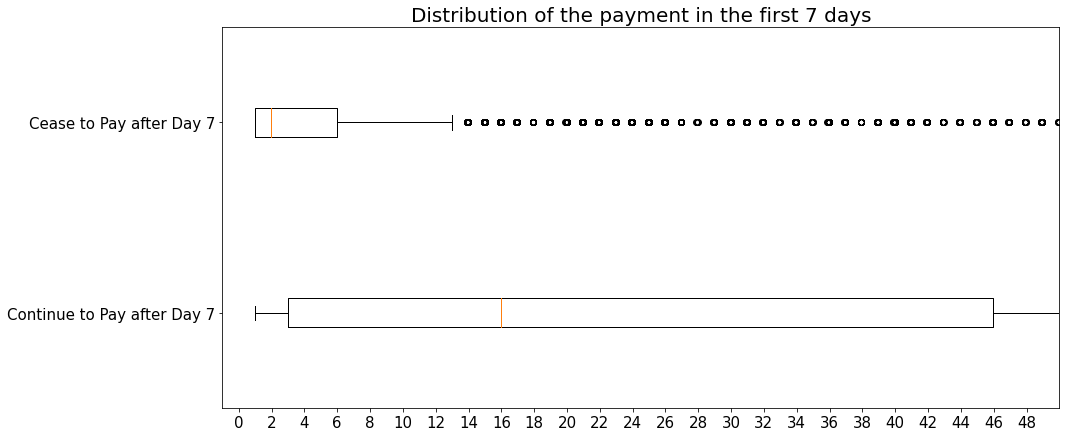

In [31]:
plt.figure(figsize=(15,7))
plt.boxplot([SevenDayPayAmount[SevenDayPayAmount != y][SevenDayPayAmount != 0],SevenDayPayAmount[SevenDayPayAmount == y][SevenDayPayAmount != 0]],labels=["Continue to Pay after Day 7","Cease to Pay after Day 7"],vert=False,showmeans=False)
plt.xlim(-1,50)
plt.title('Distribution of the payment in the first 7 days',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,50,2),fontsize=15.0)
#plt.vlines(6.0,ymin = plt.ylim()[0]+0.1,ymax = plt.ylim()[1]-0.1,colors="red",linestyles="dotted")
plt.show()

In [37]:
PotentialPoints = range(1,16)
KeepPaidList = []
StopPaidList = []
for i in PotentialPoints:
    # Take out all paid users whose payment amount exceeds i within 7 days
    HigherThanPoint = SevenDayPayAmount[SevenDayPayAmount>=i] 
    # Of these users, the percentage who continue to pay
    KeepPaid = len(HigherThanPoint[SevenDayPayAmount != y])/len(HigherThanPoint) 
    # Of these users, the percentage who cease to pay, 1-KeepPaid
    StopPaid = len(HigherThanPoint[SevenDayPayAmount == y])/len(HigherThanPoint)
#     print(i)
#     print("{:.3f}%".format(100*KeepPaid))
#     print("{:.3f}%".format(100*StopPaid))
#     print("{:.3f}%".format(KeepPaid - StopPaid))
    KeepPaidList.append(100*KeepPaid)
    StopPaidList.append(100*StopPaid)

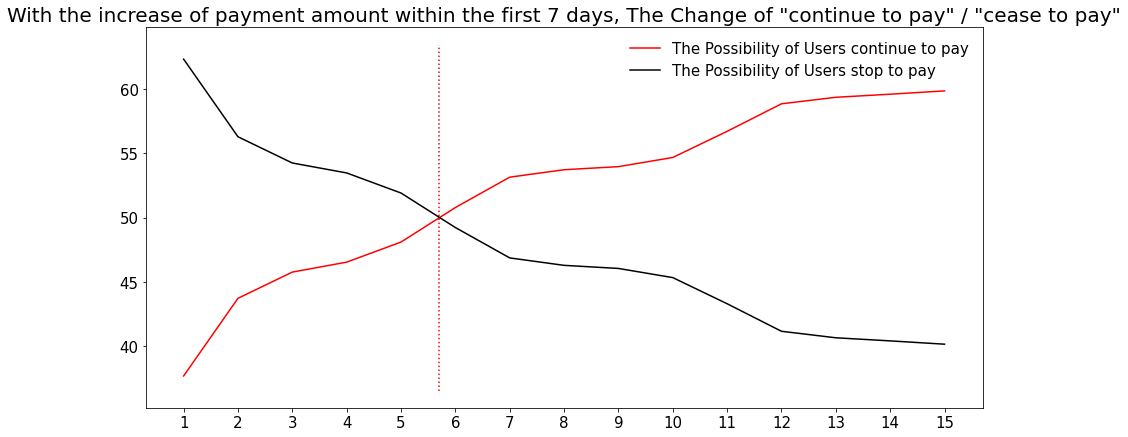

In [38]:
plt.figure(figsize=(15,7))
plt.plot(PotentialPoints,KeepPaidList,label="The Possibility of Users continue to pay",color="red")
plt.plot(PotentialPoints,StopPaidList,label="The Possibility of Users stop to pay",color="k")
#plt.xlim(-1,50)
plt.title('With the increase of payment amount within the first 7 days, The Change of \"continue to pay\" / \"cease to pay\"',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.xticks(range(0,16,1),fontsize=15.0)
plt.legend(fontsize = 15.0, frameon = False)
plt.vlines(5.7,ymin = plt.ylim()[0]+0.1,ymax = plt.ylim()[1]-0.1,colors="red",linestyles="dotted")
plt.show()

- Conclusion: When the payment amount within 7 days larger than 6 CNY, users are more likely to continue paying than not to stop paying！

Idea: 
ARPU is the average payment made by users of a game, whereas ARPPU is the average payment made by paying users. 
Currently, the game has a slightly low ARPU, but a respectable ARPPU, which implies that the economic capacity of paying users is rather strong. 
From the perspective of the proportion of the top 5,000 high-paying users within the first 45 days, the top 5,000 users in the game (accounting for less than 0.22%) generated 89% of the server's total money, and they contributed significantly. 

This leads me to believe that the paying behavior in the game should be directly related to the users' competitiveness, as many high-payment players prefer strong PK games and paying can directly make PVP extremely easy. However, the highest-paying player in the game spends only 32,000 CNY throughout the 45 days, which is a relatively low amount for SLG mobile games. If the gaming experience is exceptional, there should be ample space for enhancement. However, the problem of a small number of paying players can be addressed and the game's overall operating performance can be improved.

# 3. Features

## 3.1 Time spent online: Does the game lose users at a higher rate than average?

In [39]:
PlayTime = data.loc[:,"avg_online_minutes"] # The overall online minutes in the first 7 days
PlayTime.max()

2049.666667

In [40]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
PlayTime.describe()

count   2288007.000
mean         10.207
std          38.959
min           0.000
25%           0.500
50%           1.833
75%           4.833
max        2049.667
Name: avg_online_minutes, dtype: float64

In [41]:
PlayTime.describe(percentiles=[0.75,.9,0.95,.99]) 

count   2288007.000
mean         10.207
std          38.959
min           0.000
50%           1.833
75%           4.833
90%          15.000
95%          41.333
99%         183.657
max        2049.667
Name: avg_online_minutes, dtype: float64

In [42]:
data.loc[data["avg_online_minutes"] > 1500,:]

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
488497,645487,2018-03-04 13:43:36,697852.000,300255.000,0.000,0.000,6000.000,0.000,690379.000,196602.000,...,5,0,0,2,2,2,2049.667,0.000,0,0.000
1263615,1579134,2018-03-05 11:04:18,15722711.000,15269965.000,8895972.000,7952637.000,4554662.000,3025143.000,23321313.000,21071538.000,...,48,25,11,100,100,86,1674.667,2.980,2,514.680


In [44]:
PaidPlayTime = data.loc[data["pay_price"] != 0,"avg_online_minutes"]

PaidPlayTime.describe().T 

count   41439.000
mean      140.188
std       149.973
min         0.000
25%        33.000
50%        88.833
75%       194.667
max      1674.667
Name: avg_online_minutes, dtype: float64

Only less than 25% of users spend less than half an hour online, and the game time is significantly more than that of non-paying users

In [45]:
data.loc[data["avg_online_minutes"]<=1,"pay_price"].value_counts()

0.000     896061
0.990         51
9.990          4
4.990          3
36.960         3
5.980          3
56.950         2
99.990         2
25.970         1
1.990          1
49.990         1
26.970         1
6.980          1
19.990         1
Name: pay_price, dtype: int64

In [46]:
# The amount of payment contributed by players with limited online hours

for playtime in [1,5,15,20,25,30]:
    
    MeanPay45 = data.loc[data["avg_online_minutes"]<playtime,"prediction_pay_price"].mean()
    TotalPay45 = data.loc[data["avg_online_minutes"]<playtime,"prediction_pay_price"].sum()
    MeanPay7 = data.loc[data["avg_online_minutes"]<playtime,"pay_price"].mean()
    TotalPay7 = data.loc[data["avg_online_minutes"]<playtime,"pay_price"].sum()
    
    print("Less than {} minutes online in a week".format(playtime))
    print("\t45-day average spending is {:.3f} CNY，45-day total spending {:.3f} CNY".format(MeanPay45,TotalPay45))
    print("\t7-day average spending is {:.3f} CNY，7-day total spending {:.3f} CNY".format(MeanPay7,TotalPay7))
    print("\t7-day payment ratio {:.3f}%，45-day payment ratio {:.3f}%".format(100*TotalPay7/(data["pay_price"].sum())
                                                  ,100*TotalPay45/(data["prediction_pay_price"].sum())))


Less than 1 minutes online in a week
	45-day average spending is 0.022 CNY，45-day total spending 18323.490 CNY
	7-day average spending is 0.001 CNY，7-day total spending 574.180 CNY
	7-day payment ratio 0.047%，45-day payment ratio 0.447%
Less than 5 minutes online in a week
	45-day average spending is 0.019 CNY，45-day total spending 32572.700 CNY
	7-day average spending is 0.003 CNY，7-day total spending 4519.280 CNY
	7-day payment ratio 0.369%，45-day payment ratio 0.794%
Less than 15 minutes online in a week
	45-day average spending is 0.028 CNY，45-day total spending 57753.190 CNY
	7-day average spending is 0.009 CNY，7-day total spending 18428.260 CNY
	7-day payment ratio 1.506%，45-day payment ratio 1.408%
Less than 20 minutes online in a week
	45-day average spending is 0.038 CNY，45-day total spending 79124.920 CNY
	7-day average spending is 0.012 CNY，7-day total spending 25904.310 CNY
	7-day payment ratio 2.118%，45-day payment ratio 1.929%
Less than 25 minutes online in a week
	45-day

It is not difficult to determine that the amount of payment contributed by users with a short online history is extremely low. When simulating 2 million individuals, we can ignore users with limited online time. Here, we may identify low-value users as those who are online for less than 15 or 20 minutes per week.

In [47]:
# The amount of payment contributed by players with long online hours

for playtime in [500,600,700,800,900,1000,1200]:
    
    MeanPay45 = data.loc[data["avg_online_minutes"]>=playtime,"prediction_pay_price"].mean()
    TotalPay45 = data.loc[data["avg_online_minutes"]>=playtime,"prediction_pay_price"].sum()
    MeanPay7 = data.loc[data["avg_online_minutes"]>=playtime,"pay_price"].mean()
    TotalPay7 = data.loc[data["avg_online_minutes"]>=playtime,"pay_price"].sum()
    
    print("Less than {} minutes online in a week".format(playtime))
    print("\t45-day average spending is {:.3f} CNY，45-day total spending {:.3f} CNY".format(MeanPay45,TotalPay45))
    print("\t7-day average spending is {:.3f} CNY，7-day total spending {:.3f} CNY".format(MeanPay7,TotalPay7))
    print("\t7-day payment ratio {:.3f}%，45-day payment ratio {:.3f}%".format(100*TotalPay7/(data["pay_price"].sum())
                                                  ,100*TotalPay45/(data["prediction_pay_price"].sum())))


Less than 500 minutes online in a week
	45-day average spending is 377.113 CNY，45-day total spending 885839.060 CNY
	7-day average spending is 110.492 CNY，7-day total spending 259544.740 CNY
	7-day payment ratio 21.216%，45-day payment ratio 21.591%
Less than 600 minutes online in a week
	45-day average spending is 437.753 CNY，45-day total spending 515673.070 CNY
	7-day average spending is 130.699 CNY，7-day total spending 153963.300 CNY
	7-day payment ratio 12.586%，45-day payment ratio 12.569%
Less than 700 minutes online in a week
	45-day average spending is 427.776 CNY，45-day total spending 272921.300 CNY
	7-day average spending is 120.904 CNY，7-day total spending 77136.600 CNY
	7-day payment ratio 6.305%，45-day payment ratio 6.652%
Less than 800 minutes online in a week
	45-day average spending is 359.040 CNY，45-day total spending 113815.780 CNY
	7-day average spending is 104.344 CNY，7-day total spending 33076.950 CNY
	7-day payment ratio 2.704%，45-day payment ratio 2.774%
Less than 

Despite the fact that many players are highly engaged with the game, they are not high-value users. We can declare that people who spend above 800 minutes each week online are of low value (at the payment level). Similar to how paying users tend to dominate resources, users with a large number of resources are not necessarily paying users.

In [48]:
data.loc[data["pay_price"] != 0,"wood_add_value"].describe()

count        41439.000
mean      10712783.554
std       34752584.812
min              0.000
25%        2132829.500
50%        5267091.000
75%       10249321.000
max     1239962311.000
Name: wood_add_value, dtype: float64

In [49]:
data.loc[data["pay_price"] == 0,"wood_add_value"].describe()

count     2246568.000
mean       265084.447
std        887773.641
min             0.000
25%             0.000
50%         40088.000
75%        144657.000
max     158249380.000
Name: wood_add_value, dtype: float64

These indicate that paying users are absolutely dominant in resource volume

## 3.2 Distribution and Skewness: Is the game not beginner-friendly? Is the complexity of resource acquisition reasonable?

In [50]:
resource = data.iloc[:,2:-10]

In [51]:
resource.columns

Index(['wood_add_value', 'wood_reduce_value', 'stone_add_value',
       'stone_reduce_value', 'ivory_add_value', 'ivory_reduce_value',
       'meat_add_value', 'meat_reduce_value', 'magic_add_value',
       'magic_reduce_value', 'infantry_add_value', 'infantry_reduce_value',
       'cavalry_add_value', 'cavalry_reduce_value', 'shaman_add_value',
       'shaman_reduce_value', 'wound_infantry_add_value',
       'wound_infantry_reduce_value', 'wound_cavalry_add_value',
       'wound_cavalry_reduce_value', 'wound_shaman_add_value',
       'wound_shaman_reduce_value', 'general_acceleration_add_value',
       'general_acceleration_reduce_value', 'building_acceleration_add_value',
       'building_acceleration_reduce_value', 'reaserch_acceleration_add_value',
       'reaserch_acceleration_reduce_value', 'training_acceleration_add_value',
       'training_acceleration_reduce_value', 'treatment_acceleraion_add_value',
       'treatment_acceleration_reduce_value', 'bd_training_hut_level',
      

In [52]:
sak = pd.DataFrame()
for idx,ColName in enumerate(resource.columns):
    sak.loc[idx,"FeatureName"] = ColName
    column = data.loc[:,ColName]
    sak.loc[idx,"Skew"] = column.skew() 
    sak.loc[idx,"Kurt"] = column.kurt() 
    sak.loc[idx,"Mean"] = column.mean()

In [53]:
sak.head()

,FeatureName,Skew,Kurt,Mean
0,wood_add_value,100.635,15449.582,454306.859
1,wood_reduce_value,86.310,11367.448,369843.252
2,stone_add_value,113.794,18489.107,189778.774
3,stone_reduce_value,105.043,15515.988,137607.363
4,ivory_add_value,112.636,17682.030,80756.230


In [54]:
pd.set_option("display.max_rows",120)
sak.sort_values("Skew")

,FeatureName,Skew,Kurt,Mean
34,bd_stronghold_level,1.229,0.970,2.098
35,bd_outpost_portal_level,1.383,1.477,1.764
32,bd_training_hut_level,1.878,3.314,1.306
42,bd_magic_coin_tree_level,2.050,3.388,1.146
36,bd_barrack_level,2.114,4.327,1.284
33,bd_healing_lodge_level,2.183,4.567,1.027
41,bd_watchtower_level,2.409,5.619,0.913
37,bd_healing_spring_level,2.429,5.627,0.924
40,bd_warehouse_level,2.472,5.525,0.934
38,bd_dolmen_level,2.495,5.893,0.969


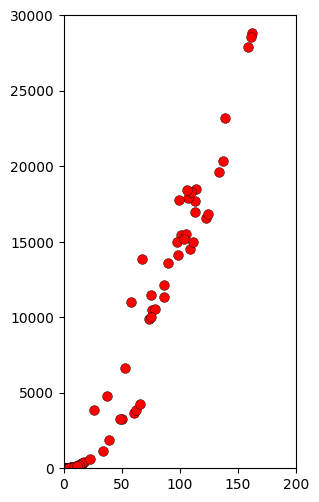

In [55]:
plt.figure(figsize=(3,6),dpi=100)
plt.scatter("Skew","Kurt", data = sak
           ,s = 50
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(0, 200)
plt.ylim(0, 30000)
plt.show()

Kurtosis and skewness seem to show a highly consistent trend - when skewness is large, kurtosis also tends to be large. Therefore, we can only consider the skewness and mean, and no longer consider the case of kurtosis.

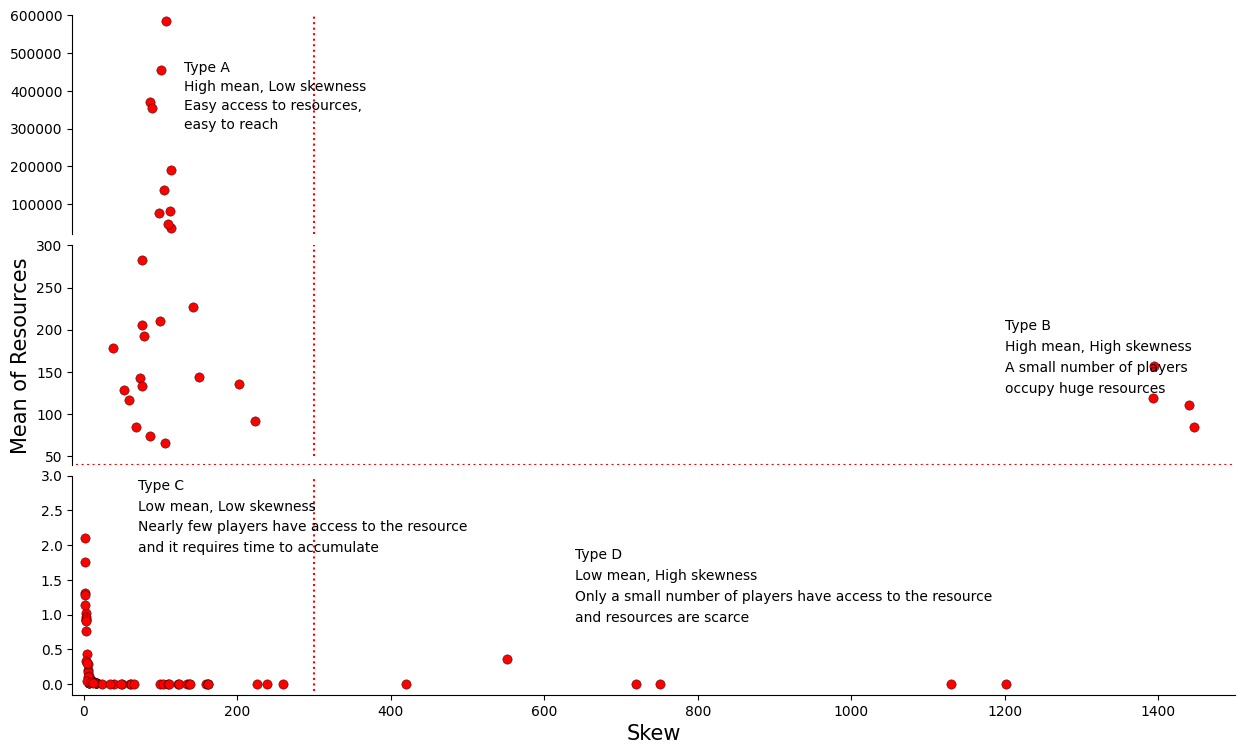

In [58]:
plt.figure(figsize=(15,9),dpi=100)


# Upper
plt.subplot(311)
plt.scatter("Skew","Mean", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500) 
plt.ylim(20000, 600000)
plt.vlines(300, 20000, 600000,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=10)
plt.text(130,450000,s="Type A")
plt.text(130,400000,s="High mean, Low skewness")
plt.text(130,350000,s="Easy access to resources,")
plt.text(130,300000,s="easy to reach")
plt.xticks([])

# Middle
plt.subplot(312)
plt.scatter("Skew","Mean", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500)
plt.ylim(40, 300)
plt.vlines(300, 50, 300,colors="red",linestyles="dotted")
plt.hlines(40,-10, 1500,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=10)
plt.ylabel("Mean of Resources", fontsize=15)
plt.text(1200,200,s="Type B")
plt.text(1200,175,s="High mean, High skewness")
plt.text(1200,150,s="A small number of players")
plt.text(1200,125,s="occupy huge resources")
plt.xticks([])

# Bottom
plt.subplot(313)
plt.scatter("Skew","Mean", data = sak
           ,s = 45
           ,c = "red"
           ,edgecolors = "k"
           ,linewidth = 0.3);
plt.xlim(-15, 1500)
plt.ylim(-0.15, 3)
plt.vlines(300, -0.1, 5,colors="red",linestyles="dotted")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("Skew", fontsize=15)
plt.yticks(fontsize=10)
plt.text(70,2.8,s="Type C")
plt.text(70,2.5,s="Low mean, Low skewness")
plt.text(70,2.2,s="Nearly few players have access to the resource")
plt.text(70,1.9,s="and it requires time to accumulate")
plt.text(640,1.8,s="Type D")
plt.text(640,1.5,s="Low mean, High skewness")
plt.text(640,1.2,s="Only a small number of players have access to the resource")
plt.text(640,0.9,s="and resources are scarce")
plt.subplots_adjust(hspace=0.05)
plt.show()


In [60]:
# Type A
A = sak.loc[sak["Mean"] > 3,:].loc[sak["Skew"]<300,:]
A

,FeatureName,Skew,Kurt,Mean
0,wood_add_value,100.635,15449.582,454306.859
1,wood_reduce_value,86.310,11367.448,369843.252
2,stone_add_value,113.794,18489.107,189778.774
3,stone_reduce_value,105.043,15515.988,137607.363
4,ivory_add_value,112.636,17682.030,80756.230
5,ivory_reduce_value,113.405,16974.594,36131.699
6,meat_add_value,106.645,17907.029,585515.505
7,meat_reduce_value,89.403,13600.967,354810.206
8,magic_add_value,97.762,14958.235,75389.535
9,magic_reduce_value,109.334,18322.774,47253.994


In [61]:
# Type B
B = sak.loc[sak["Mean"] > 3,:].loc[sak["Skew"]>300,:]
B

,FeatureName,Skew,Kurt,Mean
14,shaman_add_value,1393.339,2048745.112,119.543
15,shaman_reduce_value,1394.118,2050265.411,156.853
20,wound_shaman_add_value,1439.747,2141351.573,110.431
21,wound_shaman_reduce_value,1446.870,2155525.025,84.763


In [62]:
# Type C
sak.loc[sak["Mean"] < 3,:].loc[sak["Skew"]<300,:].shape[0]

60

In [63]:
# Type D
sak.loc[sak["Mean"] < 3,:].loc[sak["Skew"]>300,:].shape[0]

6

According to the analysis's findings, the proportion of various resources is actually pretty reasonable. Assuming if a game exclusively wishes to service paying players, there will be a large number of type B resources, and the acquisition channels of a huge number of type A resources will also be reliant on payment, but this game's design is plainly not of that nature, which demonstrates that the game is still committed to providing a better experience for ordinary players.

Therefore, the majority of players quit the game not because the beginner level is too difficult or the plot cannot be advanced. 

However, there is a significant disparity between the accessibility of various services. The basic resources can easily number in the millions or perhaps the hundreds of millions, leaving users with a severe lack of acquisition sense. From the standpoint of the distribution of type A resources, only wood and meat, the two most fundamental resources, have a distribution that is somewhat normal, but all other resources have a significant left-bias. ** It demonstrates that "low retention rate" is the cause and "Resources Distribution Anomaly" is the result. 

The most likely scenario is that the product logic is not smooth, the sense of gain is insufficient, the art is insufficient, the system bug (such as crazy flashback, etc.) or the strong sense of gold fishing and lack of high-level gameplay causes the majority of users to lose on the first day of use.

## 3.3 Impact equilibration: payment and fighting advantage

In [64]:
# Distribution of PVP winning percentage of paying players during the first 7 days
(data[data["pay_price"] !=0]["pvp_win_count"]/data[data["pay_price"] !=0]["pve_battle_count"]).describe()

count   37855.000
mean          inf
std           NaN
min         0.000
25%         0.017
50%         0.171
75%         0.538
max           inf
dtype: float64

It can be seen that the per capita PVP win rate is 53.27 percent, which is an acceptable figure for mobile game paying users, but it is not a significant advantage. Among them, the count number is less than the total number of paying players, suggesting that some players have 0 PVP times. To avoid the error of dividing by zero, these individuals are eliminated. The percentage of gamers who don't engage in PVP is:

In [65]:
1 - 35755/data[data["pay_price"] !=0].shape[0]

0.1371654721397717

13% paying players never play PVP

In [70]:
data[data["pay_price"] == 0]["pvp_battle_count"].mean()

1.723228497868749

Per capita PVP times of non-paying players. On average, a non-paying player play PVP 2 times.

In [69]:
(data[data["pay_price"] == 0]["pvp_win_count"]/data[data["pay_price"] ==0]["pvp_battle_count"]).describe()

count   539947.000
mean         0.254
std          0.355
min          0.000
25%          0.000
50%          0.000
75%          0.500
max          1.000
dtype: float64

PVP capita winning rate of non-paying players.

The average PVP win rate per capita for non-paying players is barely 25%, and 75% of them have an average win rate of less than 50%. Indeed, this condition is harsh for free players. Similarly, those players who never pay have never participated in PVP; they have never played.

In [71]:
(data[data["pay_price"] !=0]["pvp_lanch_count"]/data[data["pay_price"] !=0]["pvp_battle_count"]).describe()

count   35755.000
mean        0.452
std         0.357
min         0.000
25%         0.000
50%         0.500
75%         0.783
max         1.000
dtype: float64

For paying players, an average of 45% of PVP battles are initiated by them.

In [72]:
(data[data["pay_price"] ==0]["pvp_lanch_count"]/data[data["pay_price"] ==0]["pvp_battle_count"]).describe()

count   539947.000
mean         0.262
std          0.365
min          0.000
25%          0.000
50%          0.000
75%          0.500
max          1.000
dtype: float64

For non paying players, an average of 26% of PVP battles are initiated by them.

In [73]:
(data[data["pay_price"] !=0]["pve_win_count"]/data[data["pay_price"] !=0]["pve_battle_count"]).describe()

count   37389.000
mean        0.885
std         0.141
min         0.000
25%         0.840
50%         0.926
75%         0.988
max         1.000
dtype: float64

PVE capita winning rate of paying players.

In [76]:
(data[data["pay_price"] ==0]["pve_win_count"]/data[data["pay_price"] ==0]["pve_battle_count"]).describe()

count   703148.000
mean         0.921
std          0.179
min          0.000
25%          0.965
50%          1.000
75%          1.000
max          1.000
dtype: float64

It is not difficult to determine that the average PVE winning percentage of non-paying players is 92%, which is greater than that of paying players (88%). It appears that environmental creatures are quite weak, as the majority of gamers are able to destroy them with ease. When paying players have an absolute edge in PVP, many non-paying players will opt to fight in the PVE setting, hence we may deduce that there will be an increase in instances where non-paying players initiate PVE battles:

In [ ]:
(data[data["pay_price"] !=0]["pve_lanch_count"]/data[data["pay_price"] !=0]["pve_battle_count"]).describe()

For paying players, an average of 45% of PVE battles are initiated by them.

In [ ]:
(data[data["pay_price"] == 0]["pve_lanch_count"]/data[data["pay_price"] ==0]["pve_battle_count"]).describe()

For non-paying players, an average of 45% of PVE battles are initiated by them.

It is expected that both paying and non-paying players will freely participate in PVE. Almost all of them launch PVE combat, which may suggest that PVE battles are essential to city growth (for example, collecting resource meat requires hunting wild boars and other creatures, obtaining Magic items require hunting dragons, etc.).  According to the results of the investigation, paying has no effect on PVE combat, but has a significant impact on PVP. In this game, players may seize the territories and cities of other players, hence the balance of PVP conflicts has a significant impact on player loss. The non-paying players who survived the early stages but gradually lost ground in the latter stages may exit the game if the PVP win rate is too low.

## 3.4 Left bias produces a long tail: who are the outliers?

In [77]:
AbnormalCheck = data.iloc[:,2:-1]

In [78]:
(AbnormalCheck < 0).sum().sum() # check whether any numbers smaller than 0

0

In [79]:
AbnormalCheck.loc[AbnormalCheck["avg_online_minutes"] < 30,:]

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,20125.000,3700.000,0.000,0.000,0.000,0.000,16375.000,2000.000,0.000,0.000,...,0,0,0,0,0,0,0,0.333,0.000,0
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.333,0.000,0
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,1.167,0.000,0
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,3.167,0.000,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,2.333,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288002,15500.000,3700.000,0.000,0.000,0.000,0.000,13000.000,2000.000,0.000,0.000,...,0,0,0,0,0,0,0,0.500,0.000,0
2288003,10000.000,0.000,0.000,0.000,0.000,0.000,10000.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.833,0.000,0
2288004,131589.000,71287.000,0.000,0.000,6000.000,0.000,249356.000,39524.000,0.000,0.000,...,0,0,0,0,2,2,2,4.333,0.000,0
2288005,221984.000,122401.000,0.000,0.000,0.000,0.000,208184.000,74738.000,0.000,0.000,...,0,0,0,0,1,1,1,2.833,0.000,0


Boxplot：
When the value of any instance exceeds [QL-1.5IQR, QU+1.5IQR], the value of this instance is considered to be an outlier
QL: First Quartile，QU：Third Quartile ，IQR：QU-QL

The fundemental for box plots to identify outliers is to rely on quartile calculations. Quartiles are relatively robust, because the 25% of data beyond the quartiles will not affect the quartiles no matter how big or abnormal they are. Therefore, the outlier detection results of the box plot are more objective and strict, and have certain advantages in identifying outliers. However, due to the relatively strict rules, a large amount of data may be wiped out under extreme left-biased data.

3-sigma limits：
When (specific value of any instance - mean of the feature) > 3 * standard deviation of the feature, the value of this instance is considered to be an outlier

Since the likelihood that any data range is between [-3sigma, 3sigma] is statistically 99.73%, the 3sigma rule for identifying outliers are really highly lenient. However, the normal distribution assumption made by 3-sigma, which is not entirely compatible with our data.

#### (1) 箱线图

In [ ]:
#打印异常比例，保存异常样本的索引
NumOfSamples = data.shape[0]
abnormal = pd.DataFrame()
DataNoAbnormal = data.copy()
BoxAbnormalIdx = [] #列表：用于保存我们的异常值的索引
for idx,column in enumerate(data.columns[2:-1]):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    #过小或过大的都属于异常值
    error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)
    abnormal.loc[idx,"特征"] = column
    abnormal.loc[idx,"异常值数量"] = error.shape[0]
    abnormal.loc[idx,"异常值比例"] = "{:.3f}%".format(error.shape[0]*100/NumOfSamples)

In [ ]:
len(set(BoxAbnormalIdx)）

超过100w数据都被归为异常，数量太多无法直接删除，何况在7日内付费的用户只有4w多，很可能被这100多万数据囊括

In [ ]:
abnormal.sort_values("异常值比例",ascending=False) #左偏比较严重的特征异常值更多

#### (2) 3 Sigma

In [ ]:
#打印异常比例，保存异常样本的索引
NumOfSamples = data.shape[0]
abnormal = pd.DataFrame()
DataNoAbnormal = data.copy()
SigmaAbnormalIdx = []
for idx,column in enumerate(data.columns[2:-1]):
    feature = data.loc[:,column]
    mean_ = feature.mean()
    std_ = feature.std()
    error = feature[feature - mean_ > 3*std_]
    SigmaAbnormalIdx.extend(error.index)
    abnormal.loc[idx,"特征"] = column
    abnormal.loc[idx,"异常值数量"] = error.shape[0]
    abnormal.loc[idx,"异常值比例"] = "{:.3f}%".format(error.shape[0]*100/NumOfSamples)


In [ ]:
len(set(SigmaAbnormalIdx))

23w样本是异常，这是一个可以接受的数字，可以直接删除，但放入模型后的效果不知道怎么样

在箱线图规则下，我们看看这些异常用户的游戏时间/氪金情况

In [ ]:
data.loc[BoxAbnormalIdx,"在线时长"].describe() #在在线时长上，表现是位于氪金用户与不可尽用户之间

In [ ]:
(data.loc[BoxAbnormalIdx,"付费金额"] != 0).sum() #在异常用户中，付费用户的数量

In [ ]:
(data.loc[:,"付费金额"] != 0).sum() #所有7日付费用户数

In [ ]:
(data.loc[BoxAbnormalIdx,"45日付费金额"] != 0).sum() #在异常用户中，付费用户的数量

In [ ]:
(data.loc[:,"45日付费金额"] != 0).sum() #所有7日付费用户数

付费用户被100%包含在了异常用户里，这说明：

付费用户的数据在现有数据的大背景下（大部分用户短时间快速流失掉）下，在统计上是完全异常的，因此建模时想要辨认出付费用户，模型需要很深入的学习，有很高的过拟合风险
异常用户有100w，其中只有4w多付费，即许多与氪金用户行为高度相似的用户都没有氪金，对算法来说这部分用户是很难判断的